In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
import keras
from keras.layers.regularization.dropout import Dropout


In [2]:
#Load the dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Train data: x = %s   y = %s'% (x_train.shape,y_train.shape))
print('Test data: x = %s   y = %s'% (x_test.shape,y_test.shape))

11490434/11490434 [==============================] - 2s 0us/step
Train data: x = (60000, 28, 28)   y = (60000,)
Test data: x = (10000, 28, 28)   y = (10000,)


Output values:  [5 0 4 1 9 2 1 3 1]


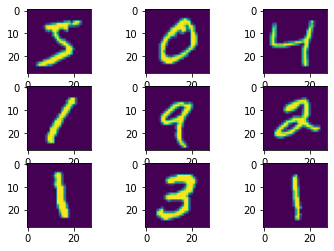

In [3]:
print("Output values: ", y_train[:9])

for i in range(9):
	plt.subplot(3, 3 , i+1)
	plt.imshow(x_train[i])    

plt.show()

In [4]:
#One hot encoding for the output
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

y_train = onehot_encoder.fit_transform(y_train)
y_test = onehot_encoder.fit_transform(y_test)

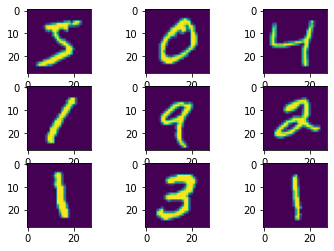

In [5]:
#Normalize the inputs
x_train = x_train/255
x_test = x_test/255

for i in range(9):
	plt.subplot(3, 3 , i+1)
	plt.imshow(x_train[i])    

plt.show()

In [6]:
# Simple model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer='adam',
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=20, 
          validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4718 - acc: 0.8753 - val_loss: 0.3127 - val_acc: 0.9139
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3039 - acc: 0.9145 - val_loss: 0.2844 - val_acc: 0.9211
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2838 - acc: 0.9204 - val_loss: 0.2762 - val_acc: 0.9239
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2732 - acc: 0.9238 - val_loss: 0.2726 - val_acc: 0.9217
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2662 - acc: 0.9257 - val_loss: 0.2651 - val_acc: 0.9265
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2617 - acc: 0.9273 - val_loss: 0.2645 - val_acc: 0.9271
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2586 - acc: 0.9288 - val_loss: 0.2672 - val_acc: 0.9268
Epoch 8/20
1875/1875 [==============================] - 5s 3ms

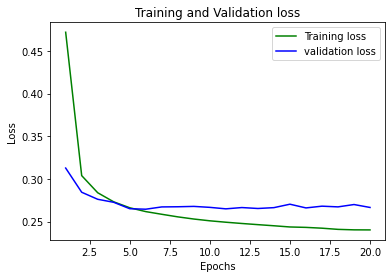

In [8]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

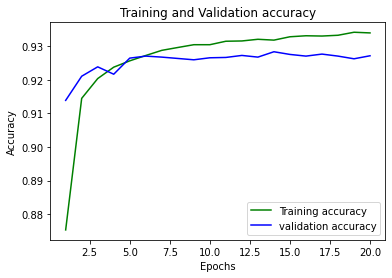

In [9]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **A three-layer feedforward network:**

In [10]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=(28,28)))
model_1.add(Dense(500, activation='relu'))
model_1.add(Dense(500, activation='relu'))
model_1.add(Dense(10, activation = 'softmax'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               392500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [11]:
optimizer = keras.optimizers.SGD(learning_rate = 0.0005)
model_1.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['acc'])

history_1 = model_1.fit(x_train, y_train, epochs=250, batch_size=64,
          validation_data=(x_test,y_test))

Epoch 1/250
938/938 [==============================] - 4s 4ms/step - loss: 2.1372 - acc: 0.3694 - val_loss: 1.9655 - val_acc: 0.5795
Epoch 2/250
938/938 [==============================] - 3s 3ms/step - loss: 1.8087 - acc: 0.6547 - val_loss: 1.6260 - val_acc: 0.7181
Epoch 3/250
938/938 [==============================] - 3s 4ms/step - loss: 1.4795 - acc: 0.7400 - val_loss: 1.3037 - val_acc: 0.7779
Epoch 4/250
938/938 [==============================] - 3s 3ms/step - loss: 1.1924 - acc: 0.7863 - val_loss: 1.0490 - val_acc: 0.8126
Epoch 5/250
938/938 [==============================] - 3s 4ms/step - loss: 0.9785 - acc: 0.8151 - val_loss: 0.8709 - val_acc: 0.8326
Epoch 6/250
938/938 [==============================] - 3s 3ms/step - loss: 0.8304 - acc: 0.8322 - val_loss: 0.7492 - val_acc: 0.8467
Epoch 7/250
938/938 [==============================] - 3s 4ms/step - loss: 0.7279 - acc: 0.8441 - val_loss: 0.6646 - val_acc: 0.8562
Epoch 8/250
938/938 [==============================] - 3s 4ms/step - 

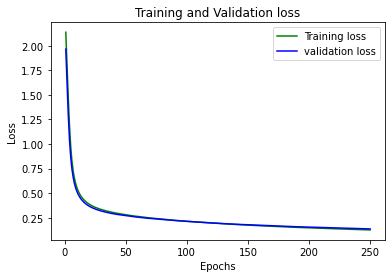

In [12]:
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
epochs = range(1,251)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

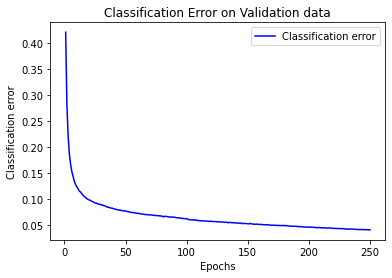

In [13]:
class_error = [] 
for i in range(0,250):
    class_error.append(1-history_1.history['val_acc'][i])
epochs = range(1,251)
plt.plot(epochs, class_error, 'b', label='Classification error')
plt.title('Classification Error on Validation data')
plt.xlabel('Epochs')
plt.ylabel('Classification error')
plt.legend()
plt.show()

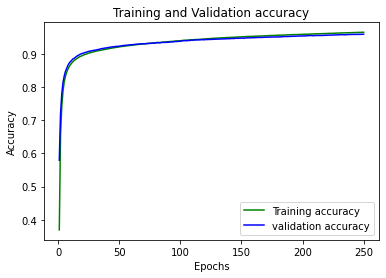

In [14]:
loss_train = history_1.history['acc']
loss_val = history_1.history['val_acc']
epochs = range(1,251)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Observation**

The training loss is less than validation loss. So, we can say that the above model is overfitting on the given data set.

## **Network with regularizations**

In [15]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=(28,28)))
model_2.add(Dense(500, activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.1)))
model_2.add(Dropout (0.3))
model_2.add(Dense(500, activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.1)))
model_2.add(Dropout (0.3))
model_2.add(Dense(10, activation = 'softmax'))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-tr

In [16]:
optimizer_2 = keras.optimizers.SGD(learning_rate = 0.0005)
model_2.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer_2,
              metrics = ['acc'])

history_2 = model_2.fit(x_train, y_train, epochs=250, batch_size=64,
          validation_data=(x_test,y_test))

Epoch 1/250
938/938 [==============================] - 4s 4ms/step - loss: 103.5492 - acc: 0.1817 - val_loss: 94.1904 - val_acc: 0.4975
Epoch 2/250
938/938 [==============================] - 3s 3ms/step - loss: 86.0490 - acc: 0.4167 - val_loss: 78.2999 - val_acc: 0.6689
Epoch 3/250
938/938 [==============================] - 3s 4ms/step - loss: 71.5769 - acc: 0.5587 - val_loss: 65.1388 - val_acc: 0.7246
Epoch 4/250
938/938 [==============================] - 4s 4ms/step - loss: 59.5875 - acc: 0.6285 - val_loss: 54.2314 - val_acc: 0.7493
Epoch 5/250
938/938 [==============================] - 4s 4ms/step - loss: 49.6494 - acc: 0.6703 - val_loss: 45.1920 - val_acc: 0.7660
Epoch 6/250
938/938 [==============================] - 4s 4ms/step - loss: 41.4140 - acc: 0.6972 - val_loss: 37.7043 - val_acc: 0.7766
Epoch 7/250
938/938 [==============================] - 3s 3ms/step - loss: 34.5892 - acc: 0.7141 - val_loss: 31.5039 - val_acc: 0.7864
Epoch 8/250
938/938 [==============================] -

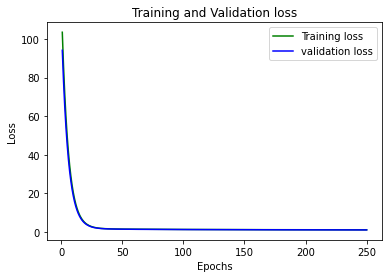

In [17]:
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']
epochs = range(1,251)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

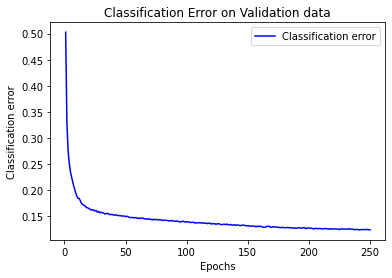

In [18]:
class_error = [] 
for i in range(0,250):
    class_error.append(1-history_2.history['val_acc'][i])
epochs = range(1,251)
plt.plot(epochs, class_error, 'b', label='Classification error')
plt.title('Classification Error on Validation data')
plt.xlabel('Epochs')
plt.ylabel('Classification error')
plt.legend()
plt.show()

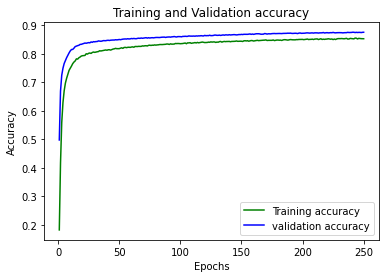

In [19]:
loss_train = history_2.history['acc']
loss_val = history_2.history['val_acc']
epochs = range(1,251)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Observation**
In the above experiment the training loss is more than validation loss. So, we can state that the above model is not overfitting. 